In [1]:
from langchain.agents import tool

In [2]:
@tool
def multiply(a:int,b:int)->int:
    '''This is a multiplication tool'''
    return a*b

In [3]:
multiply.invoke({"a":10,"b":4})

40

In [4]:
@tool
def get_word_length(word1):
    """This is a tool for calcualting the length of word"""
    return len(word1)

In [5]:
get_word_length.invoke({"word1":"pratham"})

7

In [6]:
def function1(input1):
    return input1 + " from function1"

In [7]:
def function2(input2):
    return input2 + " from function2"

In [8]:
def function3(input3):
    pass

In [9]:
from langgraph.graph import StateGraph
from typing import Annotated
from langgraph.graph.message import add_messages
from typing_extensions import TypedDict

In [10]:
# Simple state - just a string value
State = str

In [11]:
workflow1=StateGraph(State)

In [12]:
workflow1.add_node("fun1",function1)

In [13]:
workflow1.add_node("fun2",function2)

In [14]:
workflow1.add_edge("fun1","fun2")

In [15]:
workflow1.set_entry_point("fun1")

In [16]:
workflow1.set_finish_point("fun2")

In [17]:
app=workflow1.compile()

In [19]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

ValueError: Failed to reach https://mermaid.ink/ API while trying to render your graph. Status code: 502.

To resolve this issue:
1. Check your internet connection and try again
2. Try with higher retry settings: `draw_mermaid_png(..., max_retries=5, retry_delay=2.0)`
3. Use the Pyppeteer rendering method which will render your graph locally in a browser: `draw_mermaid_png(..., draw_method=MermaidDrawMethod.PYPPETEER)`

In [ ]:
app.invoke("hi this is pratham")

'hi this is pratham from function1 from function2'

In [ ]:
for output in app.stream("hi this is rohit"):
    for key,val in output.items():
        print(f"here is output from {key}")
        print("______")
        print(val)
        print("\n")

here is output from fun1
______
hi this is rohit from function1


here is output from fun2
______
hi this is rohit from function1 from function2




In [ ]:
from langchain_openai import AzureChatOpenAI
import os
from dotenv import load_dotenv

load_dotenv()



True

In [ ]:


def token_counter(input):
    return f"Number of tokens{len(input.split())}"
    

In [ ]:
State2=str

In [ ]:
workflow2=StateGraph(State2)

In [ ]:
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))  # Go up one directory

from llm_provider import LLM_provider
llm=LLM_provider()

In [ ]:
workflow2.add_node("My-LLM",llm.invoke)

In [ ]:
workflow2.add_node("LLM_token_counter",token_counter)

In [ ]:
workflow2.add_edge("My-LLM","LLM_token_counter")

In [ ]:
workflow2.set_entry_point("My-LLM")
workflow2.set_finish_point("LLM_token_counter")

In [ ]:
app2=workflow2.compile()

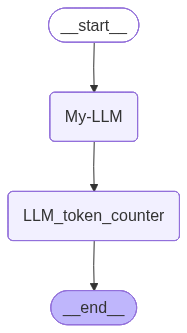

In [ ]:
from IPython.display import Image,display
display(Image(app2.get_graph().draw_mermaid_png()))

In [ ]:
app2.invoke("can you tell me about indias capital? just the answer")

'Number of tokens2'

In [ ]:
for output in app2.stream("describe me in one word"):
    for key,val in output.items():
        print(f"here is output from {key}")
        print("______")
        print(val)
        print("\n")

here is output from My-LLM
______
Unique.


here is output from LLM_token_counter
______
Number of tokens1


